# Generate a CW Signal

In [2]:
from soapcw import cw
import matplotlib.pyplot as plt
import numpy as np

## Set up CW signal

In [3]:
sig = cw.GenerateSignal()
# define signal parameters
sig.alpha = 3.310726752188296
sig.delta = -0.8824241920781501
sig.cosi = -0.63086
sig.phi0 = 4.007
sig.psi = 0.52563
sig.f = [100.05,-1e-17,0]
sig.tref = 946339148.816094
sig.h0 = 3e-24
# define ephemeredies (optional the default is below)
#sig.earth_ephem = "earth00-19-DE405.dat.gz"
#sig.sun_ephem = "sun00-19-DE405.dat.gz"


## Generate spectrogram from signal

In [4]:
# set the spectrogram parameters
nsft, tstart, tsft, flow, fhigh = 22538, 931042949, 1800., 100.0,100.1

In [5]:
#set snr of signal
snr = 200

In [6]:
#generate the spectrogram with above parameters
spect = sig.get_spectrogram(tstart = tstart, nsft=nsft,tsft=tsft,fmin=flow,fmax=fhigh,dets=["H1"],snr=snr)

In [7]:
# sum the sfts over 1 day to increase SNR and average out antenna pattern
spect.sum_sfts()

Text(0, 0.5, 'Frequency [Hz]')

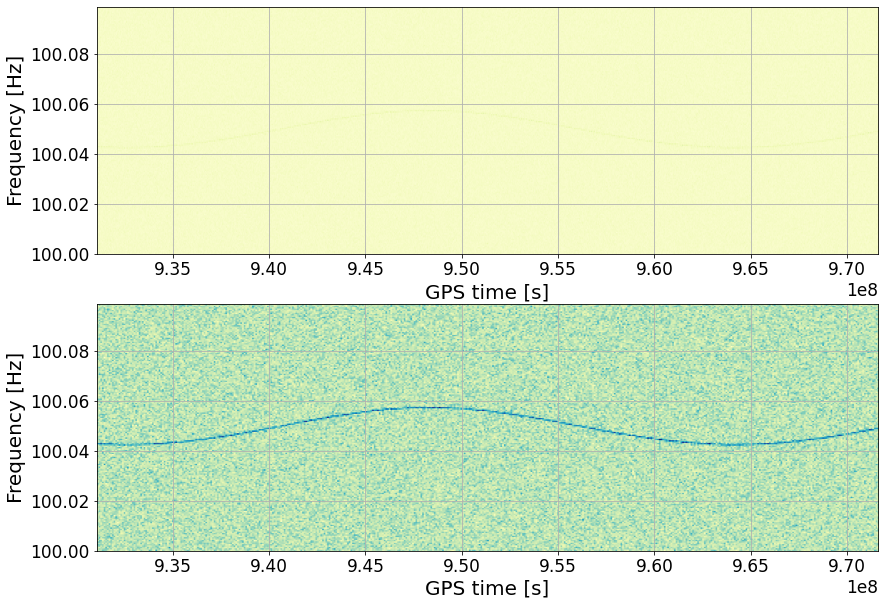

In [8]:
fig, ax = plt.subplots(nrows=2,figsize=(14,10))
ax[0].imshow(spect.H1.norm_sft_power.T,aspect="auto",origin="lower",extent=[spect.epochs.min(),spect.epochs.max(),spect.frequencies.min(),spect.frequencies.max()],cmap="YlGnBu")
ax[1].imshow(spect.H1.summed_norm_sft_power.T,aspect="auto",origin="lower",extent=[spect.epochs.min(),spect.epochs.max(),spect.frequencies.min(),spect.frequencies.max()],cmap="YlGnBu")
ax[0].set_xlabel("GPS time [s]",fontsize=20)
ax[0].set_ylabel("Frequency [Hz]",fontsize=20)
ax[1].set_xlabel("GPS time [s]",fontsize=20)
ax[1].set_ylabel("Frequency [Hz]",fontsize=20)

#### Generating multiple detectors spectrograms

In [9]:
# set total SNR of signal
snr = 200

There are a number of ways to generate signals from multiple detectors, by either setting the detectors by name using `dets=["H1","L1"]` or by setting the noise floor of each detector manually `Sn={"H1":1,"L1":2 ...}`

In [10]:
#generate the spectrogram with above parameters by naming each detector
spect_2 = sig.get_spectrogram(tstart = tstart, nsft=nsft,tsft=tsft,fmin=flow,fmax=fhigh,dets=["H1","L1"],snr=snr)

In [11]:
#generate the spectrogram with above parameters by setting noise floor of each detector (recommended) (signal amplitude is scale to achive the given SNR)
spect_2 = sig.get_spectrogram(tstart = tstart, nsft=nsft,tsft=tsft,fmin=flow,fmax=fhigh,Sn={"H1":np.ones(nsft),"L1":np.ones(nsft)*2},snr=snr)

In [12]:
# sum the sfts over 1 day to increase SNR
spect_2.sum_sfts()

Text(0, 0.5, 'Frequency [Hz] (L1)')

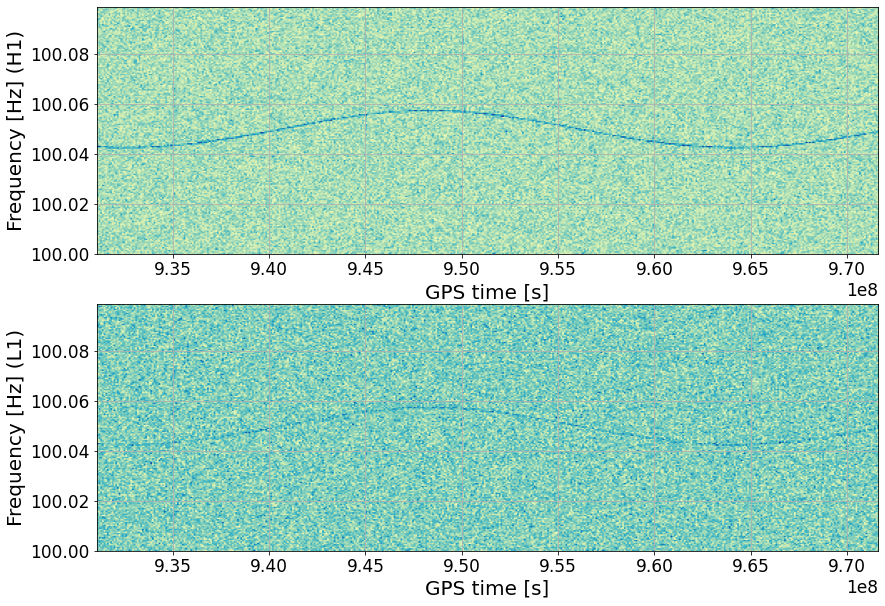

In [13]:
fig, ax = plt.subplots(nrows=2,figsize=(14,10))
ax[0].imshow(spect_2.H1.summed_norm_sft_power.T,aspect="auto",origin="lower",extent=[spect.epochs.min(),spect.epochs.max(),spect.frequencies.min(),spect.frequencies.max()],cmap="YlGnBu")
ax[1].imshow(spect_2.L1.summed_norm_sft_power.T,aspect="auto",origin="lower",extent=[spect.epochs.min(),spect.epochs.max(),spect.frequencies.min(),spect.frequencies.max()],cmap="YlGnBu")
ax[0].set_xlabel("GPS time [s]",fontsize=20)
ax[0].set_ylabel("Frequency [Hz] (H1)",fontsize=20)
ax[1].set_xlabel("GPS time [s]",fontsize=20)
ax[1].set_ylabel("Frequency [Hz] (L1)",fontsize=20)

## Generate time series from signal

In [14]:
# get signal timeseries
ts_sig = sig.get_timeseries(tstart=tstart,tref=tstart,duration=tsft/10,detectors=["H1"],sample_frequency=4096)

Text(0, 0.5, 'Amplitude')

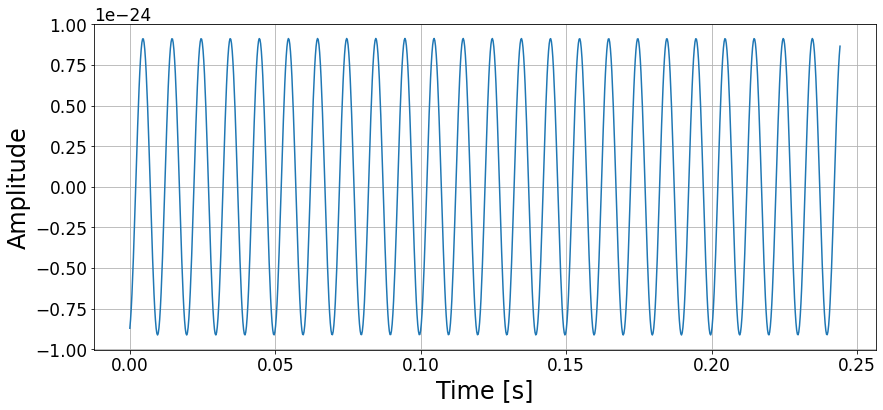

In [15]:
fig, ax = plt.subplots(figsize=(14,6))
ax.plot(np.linspace(0, 1000*ts_sig.H1.delta_t, 1000),ts_sig.H1.timeseries[:1000])
ax.set_xlabel("Time [s]")
ax.set_ylabel("Amplitude")

In [16]:
Sn = 1e-26**2
ts = sig.get_timeseries(tstart=tstart,tref=tstart,duration=tsft/10,Sn={"H1":Sn,"L1":Sn},sample_frequency=4096)

Text(0, 0.5, 'Amplitude')

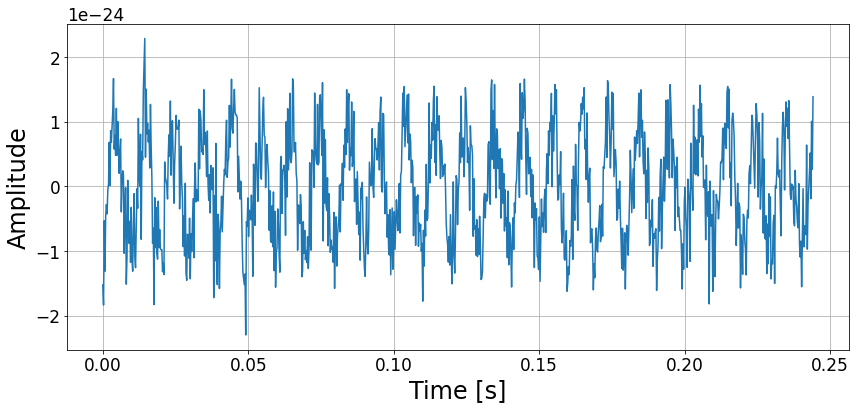

In [17]:
fig, ax = plt.subplots(figsize=(14,6))
ax.plot(np.linspace(0, 1000*ts.H1.delta_t, 1000),ts.H1.timeseries[:1000])
ax.set_xlabel("Time [s]")
ax.set_ylabel("Amplitude")

## Make SFT from timeseries

In [18]:
sfts = ts.H1.sfts_from_timeseries(tsft=90)

Text(0, 0.5, 'Amplitude')

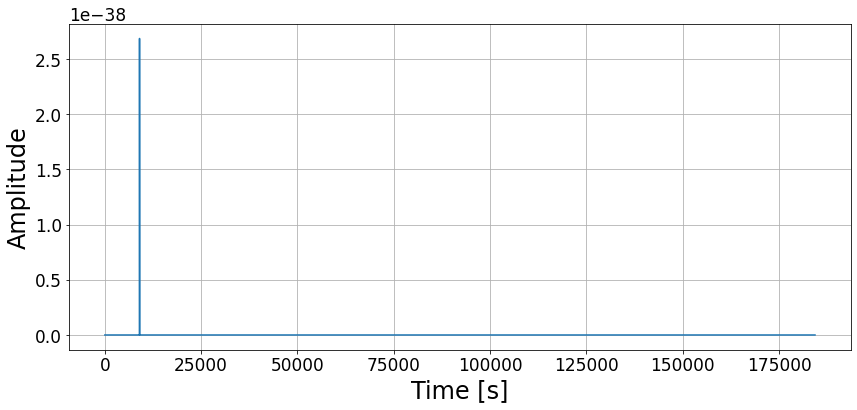

In [19]:
fig, ax = plt.subplots(figsize=(14,6))
ax.plot(np.abs(sfts.sft[0])**2)
ax.set_xlabel("Time [s]")
ax.set_ylabel("Amplitude")

## Write SFT to file

In [36]:
sfts.write_sft_files("./")

RuntimeError: Invalid argument